# **Step 1: Exploratory Data Analysis (EDA)**

In [81]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
import statsmodels.api as sm
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
df=pd.read_csv('ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [83]:
# Convert 'Fuel_Type' column to numerical representation
df['Fuel_Type'] = df['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
df.median()

,0
Price,9900.0
Age_08_04,61.0
KM,63389.5
Fuel_Type,0.0
HP,110.0
Automatic,0.0
cc,1600.0
Doors,4.0
Cylinders,4.0
Gears,5.0


In [84]:
#Summary Statistics
df.describe()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,0.131616,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,0.371572,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,0.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,0.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,0.000000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,0.000000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,2.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [85]:
#Preprocessing
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [86]:
df.shape

(1436, 11)

In [87]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   Fuel_Type  1436 non-null   int64
 4   HP         1436 non-null   int64
 5   Automatic  1436 non-null   int64
 6   cc         1436 non-null   int64
 7   Doors      1436 non-null   int64
 8   Cylinders  1436 non-null   int64
 9   Gears      1436 non-null   int64
 10  Weight     1436 non-null   int64
dtypes: int64(11)
memory usage: 123.5 KB


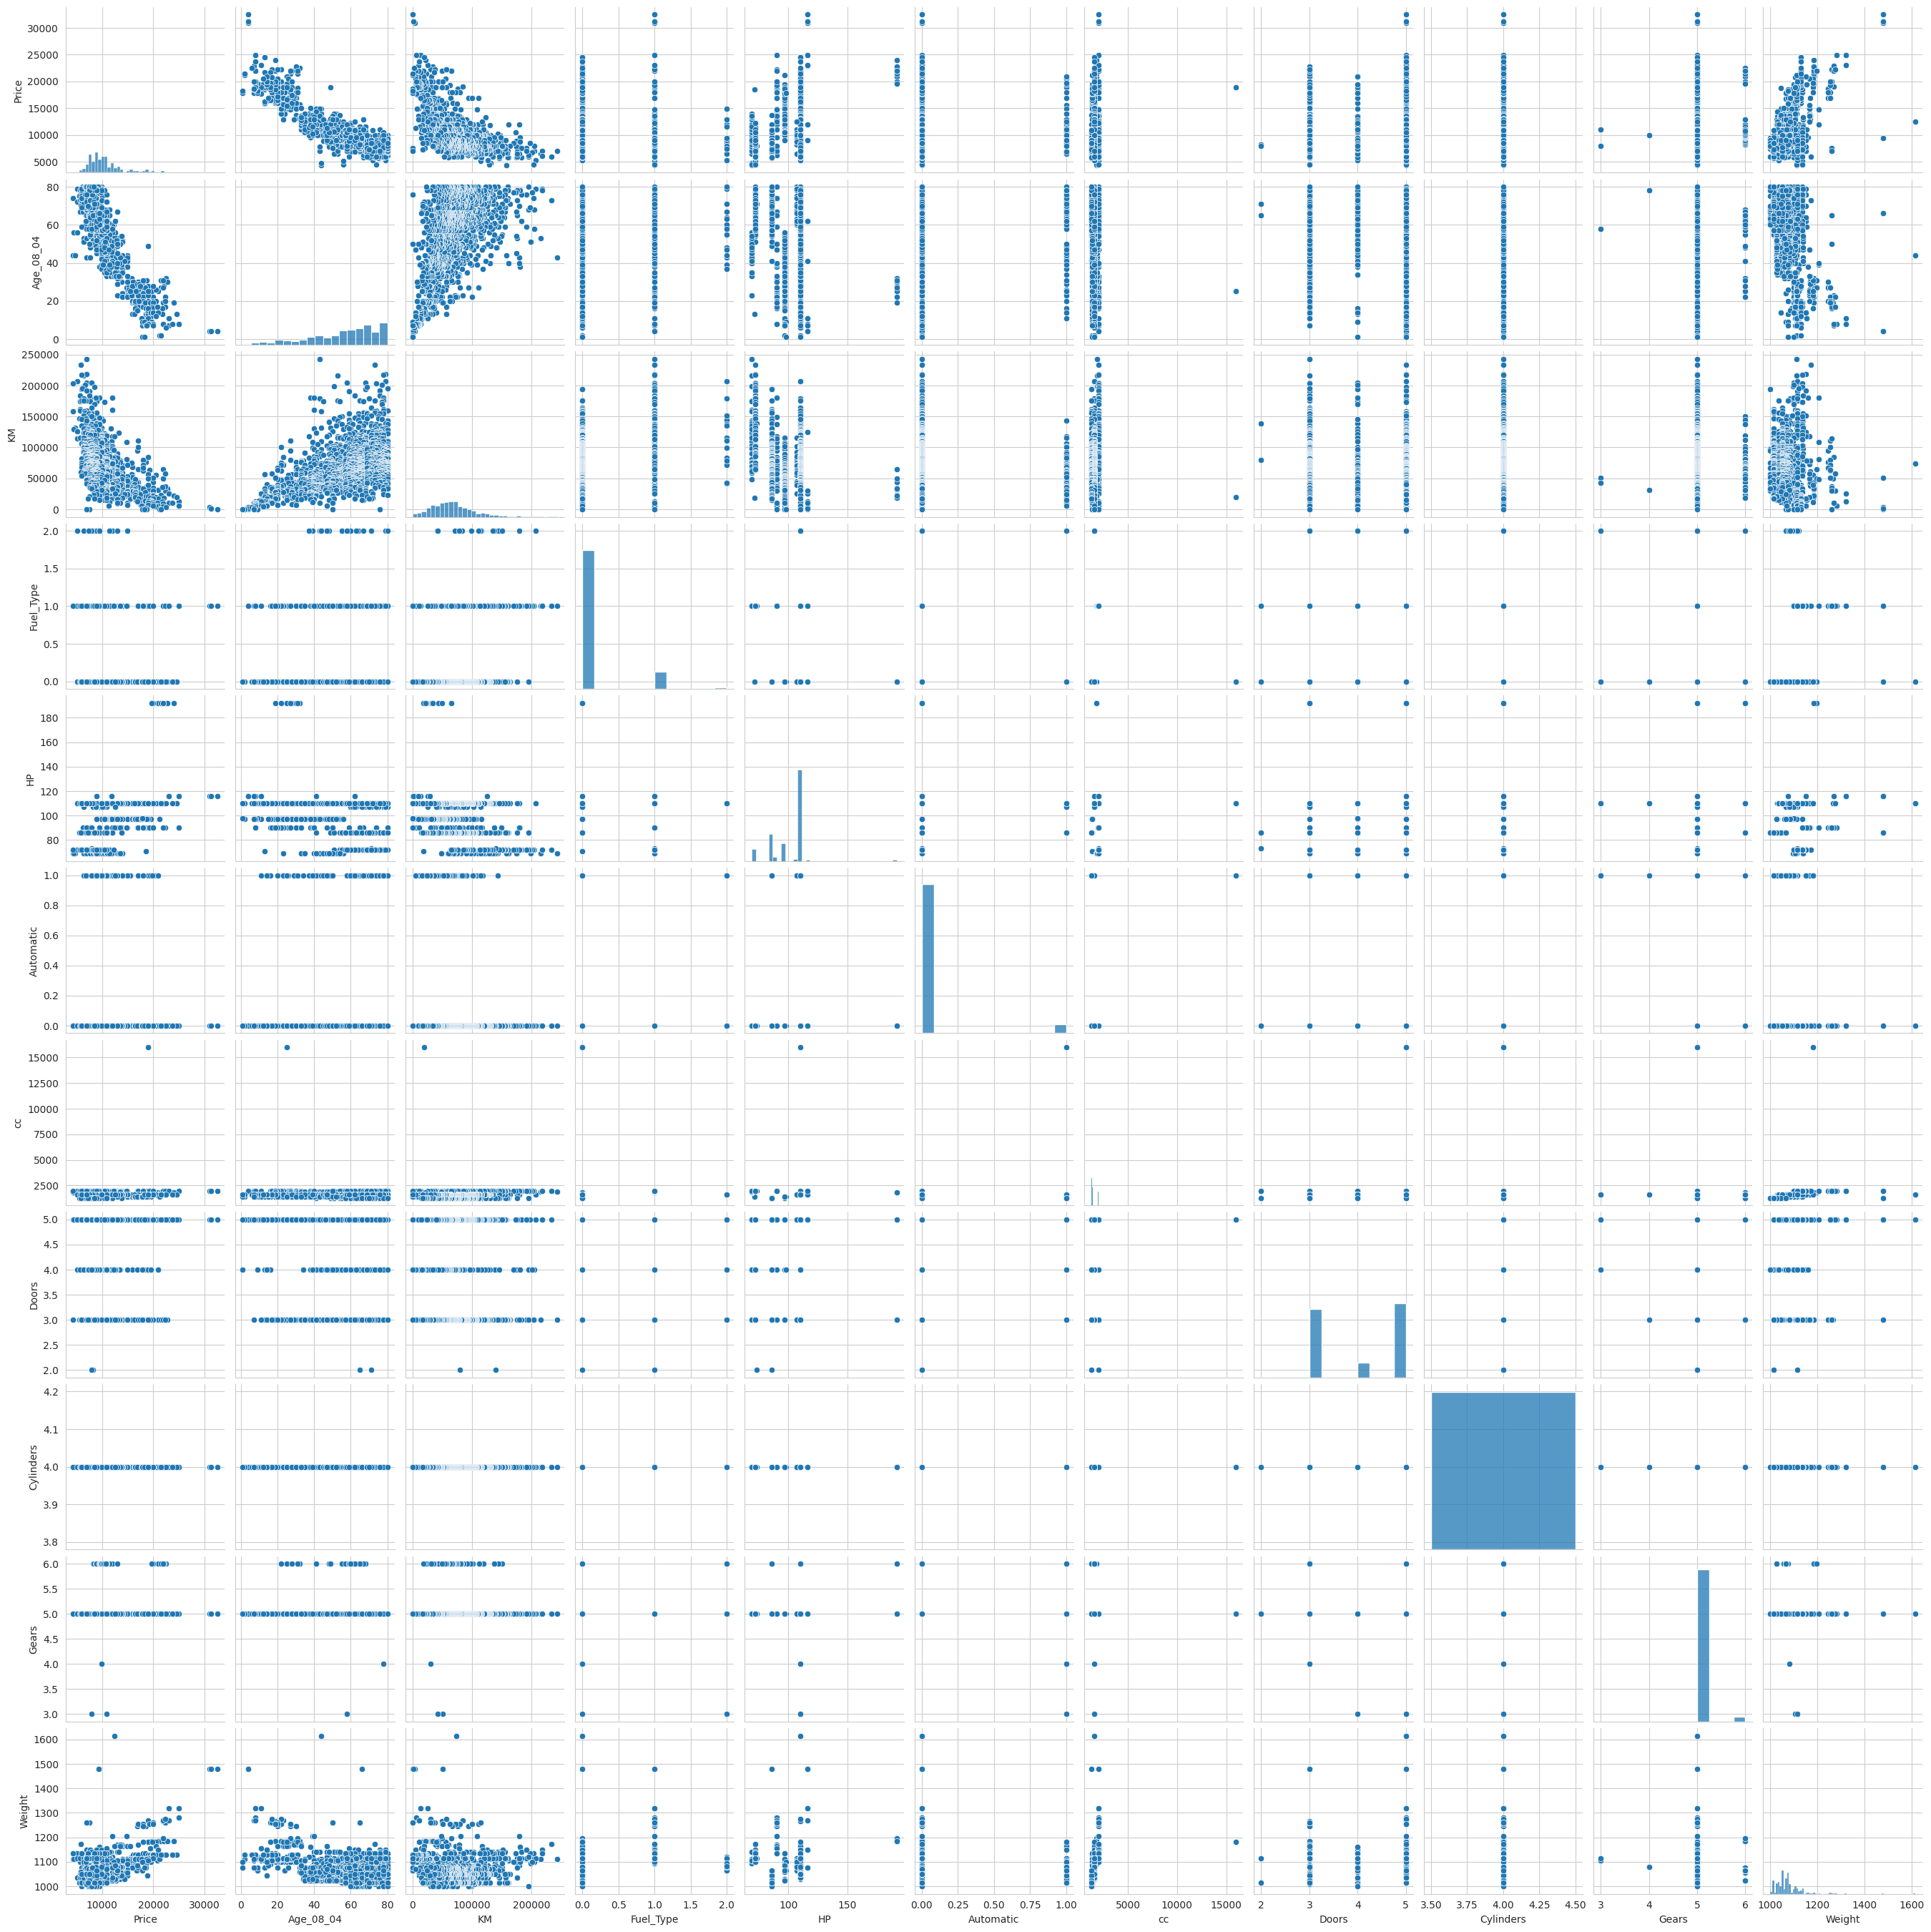

In [89]:
#Format the plot background and scatter plots for all the variables
sns.set_style('whitegrid')
sns.pairplot(df)

In [90]:
df.duplicated().sum()

1

In [91]:
df1=df.drop_duplicates(ignore_index=True)
df1

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,0,86,0,1300,3,4,5,1025
1431,10845,72,19000,0,86,0,1300,3,4,5,1015
1432,8500,71,17016,0,86,0,1300,3,4,5,1015
1433,7250,70,16916,0,86,0,1300,3,4,5,1015


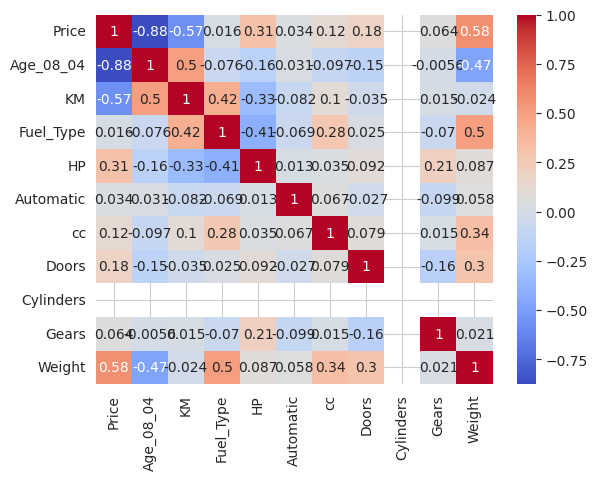

In [92]:
# Calculate the correlation matrix
corr_matrix = df1.corr()

# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [93]:
df1.corr()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876273,-0.569420,0.015883,0.314134,0.033928,0.124375,0.183604,NaN,0.063831,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.076382,-0.155293,0.031354,-0.096549,-0.146929,NaN,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,0.424118,-0.332904,-0.082168,0.103822,-0.035193,NaN,0.014890,-0.023969
Fuel_Type,0.015883,-0.076382,0.424118,1.000000,-0.411973,-0.069456,0.276236,0.025339,NaN,-0.069560,0.502479
HP,0.314134,-0.155293,-0.332904,-0.411973,1.000000,0.013313,0.035207,0.091803,NaN,0.209642,0.087143
Automatic,0.033928,0.031354,-0.082168,-0.069456,0.013313,1.000000,0.066934,-0.027492,NaN,-0.098582,0.058499
cc,0.124375,-0.096549,0.103822,0.276236,0.035207,0.066934,1.000000,0.079254,NaN,0.014732,0.335077
Doors,0.183604,-0.146929,-0.035193,0.025339,0.091803,-0.027492,0.079254,1.000000,NaN,-0.160101,0.301734
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063831,-0.005629,0.014890,-0.069560,0.209642,-0.098582,0.014732,-0.160101,NaN,1.000000,0.021238


<Axes: >

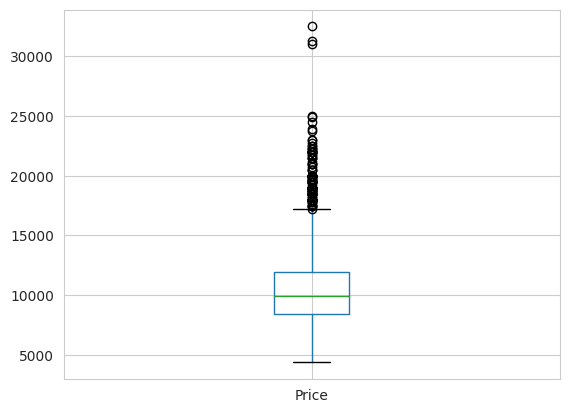

In [94]:
df1.boxplot('Price')

In [95]:
df1[['Price','Weight']].corr()

,Price,Weight
Price,1.000000,0.575869
Weight,0.575869,1.000000


<Axes: >

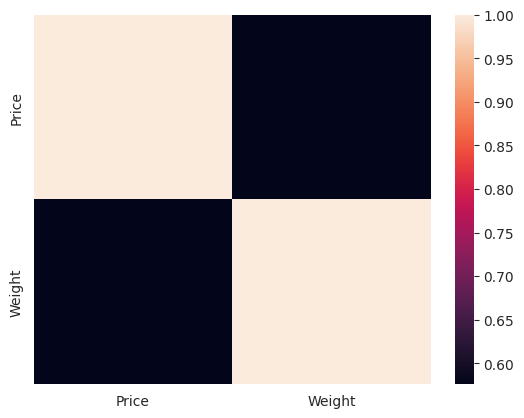

In [96]:
sns.heatmap(df1[['Price','Weight']].corr())

# Step 2: Split the Dataset

In [97]:
x = df1.drop('Price',axis=1)
y = df1['Price']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("X_Train Shape:",x_train.shape)
print("Y_Train Shape:",y_train.shape)
print("X_Test Shape:",x_test.shape)
print("Y_Test Shape:",y_test.shape)

X_Train Shape: (1148, 10)
Y_Train Shape: (1148,)
X_Test Shape: (287, 10)
Y_Test Shape: (287,)


# Step 3: Build Multiple Linear Regression Models

In [98]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [99]:
y_pred=linear_model.predict(x_test)
y_pred

array([10771.2771743 , 10336.13685636,  9300.14645287,  9383.27822615,
        8435.76785895,  8445.30068545,  7936.52725684,  8286.94272138,
       11767.14335883, 12375.17502016,  9479.95897656,  9353.10818538,
       13188.73160423, 12233.66757083,  8967.21646198, 11552.49130967,
       12313.21744619, 17508.98900451,  9955.97624331, 11465.13575011,
       11490.36200939, 18077.25831313,  9819.07059707, 10397.12949576,
        7419.22646204, 16012.96400703,  7106.33604153,  8333.42756975,
       15617.83563246, 13859.06122019,  8182.55429566, 10474.07520907,
       10113.64693143, 10140.65103679, 10035.58555088,  8641.96418298,
        8828.64778893, 10006.4081339 , 16328.91829034, 10681.62924074,
        8767.35122328,  9543.94520414, 10172.74049349,  8543.02605237,
       10585.06079855, 17603.67456708, 10440.81994029,  9228.6621402 ,
       10687.78430641, 12510.29417278, 12854.76621102,  6285.62577759,
       14905.09873082, 16323.27129081,  6059.43754006,  7788.36653087,
      

In [100]:
linear_model.score(x_train,y_train)

0.8694838434310366

In [101]:
linear_model.score(x_test,y_test)

0.8327471995993051

In [102]:
linear_model.intercept_

-10796.2285921066

In [103]:
linear_model.coef_

array([-1.21861473e+02, -1.68225953e-02, -8.47820421e+02,  2.35867776e+01,
        3.75454990e+02, -9.66412838e-02, -6.04109417e+01, -2.27373675e-13,
        4.48000381e+02,  2.36278733e+01])

In [104]:
# Putting together the coefficient and their corrsponding variable names
linear_model_coefficient = pd.DataFrame()
linear_model_coefficient["Columns"] = x_train.columns
linear_model_coefficient['Coefficient Estimate'] = pd.Series(linear_model.coef_)
print(linear_model_coefficient)

     Columns  Coefficient Estimate
0  Age_08_04         -1.218615e+02
1         KM         -1.682260e-02
2  Fuel_Type         -8.478204e+02
3         HP          2.358678e+01
4  Automatic          3.754550e+02
5         cc         -9.664128e-02
6      Doors         -6.041094e+01
7  Cylinders         -2.273737e-13
8      Gears          4.480004e+02
9     Weight          2.362787e+01


<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

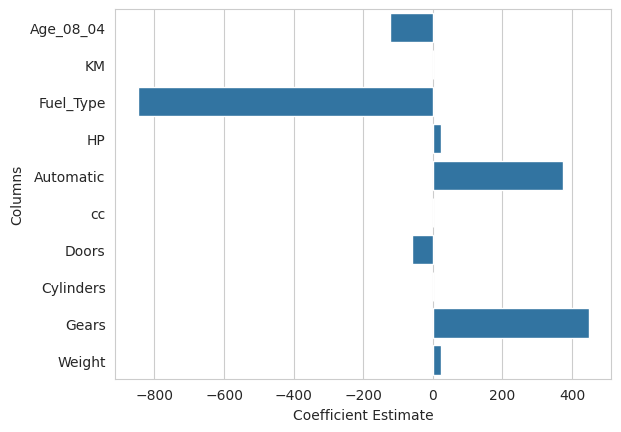

In [105]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=linear_model_coefficient)

In [106]:
# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

Mean squared Error on test set :  2006554.2201165317


In [107]:
r2_score(y_test,y_pred)

0.8327471995993051

<Axes: xlabel='Price'>

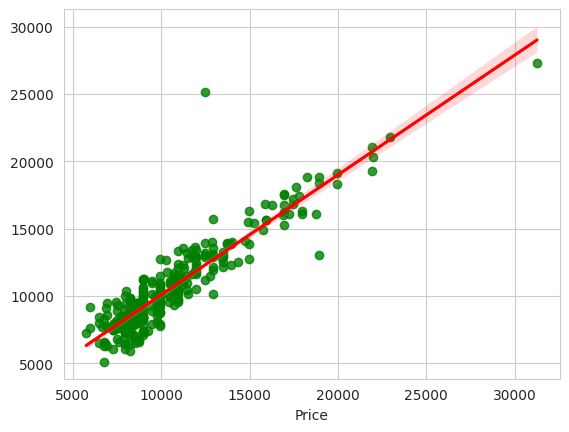

In [108]:
sns.regplot(data=df1,x=y_test,y=y_pred,scatter_kws={'color':'green'},line_kws={'color':'red'})

In [109]:
import statsmodels.formula.api as smf
model1=smf.ols('Price~Age_08_04+KM+Fuel_Type+HP+cc+Doors+Gears+Weight',data=df1).fit()

In [110]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1127.
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        05:56:16   Log-Likelihood:                -12362.
No. Observations:                1435   AIC:                         2.474e+04
Df Residuals:                    1426   BIC:                         2.479e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8618.7653   1369.666     -6.293      0.000   -1.13e+04   -5931.989
Age_08_04   -123.2082      2.608    -47.237      0.000    -128.325    -118.092
KM            -0.0177      0.001    -13.494      0.000      -0.020      -0.015
Fuel_Type   -617.0386    145.592     -4.238      0.000    -902.637    -331.441
HP            23.2994      2.872      8.114      0.000      17.666      28.932
cc            -0.0418      0.090     -0.465      0.642      -0.218       0.134
Doors        -35.7894     40.222     -0.890      0.374    -114.690      43.112
Gears        582.2973    196.381      2.965      0.003     197.070     967.525
Weight        20.9344      1.014     20.653      0.000      18.946      22.923
==============================================================================
Omnibus:                      270.225   Durbin-Watson:                   1.608
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2870.669
Skew:                          -0.545   Prob(JB):                         0.00
Kurtosis:                       9.843   Cond. No.                     3.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
model2=smf.ols('Price~cc',data=df1).fit()

In [112]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           2.29e-06
Time:                        05:56:17   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
model3=smf.ols('Price~Doors',data=df1).fit()

In [114]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           2.40e-12
Time:                        05:56:17   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
model4=smf.ols('Price~Doors+cc',data=df1).fit()

In [116]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           2.55e-15
Time:                        05:56:17   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
cc             0.9398      0.220      4.268      0.000       0.508       1.372
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
model4.resid.mean()

-3.019497058117431e-10

In [118]:
model4.resid_pearson

array([ 0.86893322,  0.93980501,  0.99650243, ..., -0.36201304,
       -0.71637196, -1.25685978])

<Axes: ylabel='Frequency'>

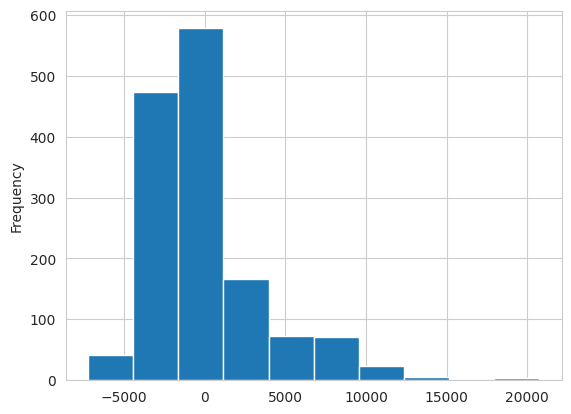

In [119]:
model4.resid.plot(kind='hist')

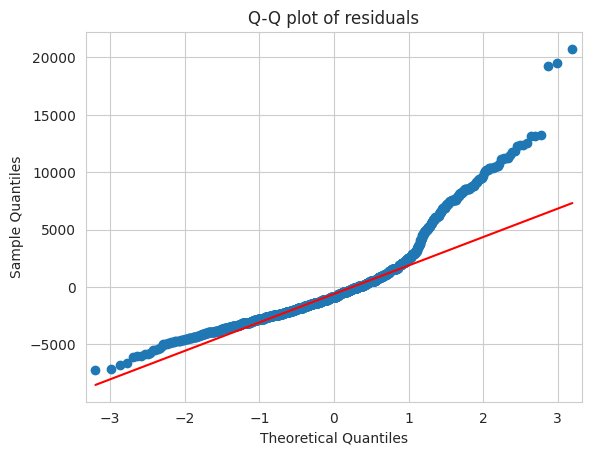

In [120]:
qqplot=sm.qqplot(model4.resid,line='q')
plt.title("Q-Q plot of residuals")
plt.show()

# Step 4: Evaluate Model Performance

In [121]:
!pip install scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

In [122]:
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    # Use the imported mean_squared_error function
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

mse1, r2_1 = evaluate_model(linear_model, x_test, y_test)
mse2, r2_2 = evaluate_model(model1, x_test, y_test)
mse3, r2_3 = evaluate_model(model2, x_test, y_test)
mse4, r2_4 = evaluate_model(model3, x_test, y_test)
mse5, r2_5 = evaluate_model(model4, x_test, y_test)

d1 = {'Models':['Linear Regression','Model1','Model2','Model3','Model4'],'MSE':[mse1,mse2,mse3,mse4,mse5],'R2':[r2_1,r2_2,r2_3,r2_4,r2_5]}
data_frame = pd.DataFrame(d1)
data_frame


,Models,MSE,R2
0,Linear Regression,2.006554e+06,0.832747
1,Model1,1.886450e+06,0.842758
2,Model2,1.178030e+07,0.018074
3,Model3,1.132730e+07,0.055833
4,Model4,1.117590e+07,0.068453


# Step 5: Apply Lasso and Ridge Methods

In [123]:
ridge=Ridge()

In [124]:
params={'alpha':[1,2,3,4,5]}

In [125]:
grid_search=GridSearchCV(ridge,params)

In [126]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(), param_grid={'alpha': [1, 2, 3, 4, 5]})

In [127]:
grid_search.best_params_

{'alpha': 1}

In [128]:
# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred_ridge = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred_ridge - y_test)**2)
print("Mean squared error on test set",mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

Mean squared error on test set 2004802.92702281
     Columns  Coefficient Estimate
0  Age_08_04           -121.841188
1         KM             -0.016867
2  Fuel_Type           -835.057130
3         HP             23.731363
4  Automatic            369.915566
5         cc             -0.097047
6      Doors            -60.355024
7  Cylinders              0.000000
8      Gears            433.997125
9     Weight             23.581646


In [129]:
y_pred_ridge

array([10757.29746051, 10336.56076961,  9301.90897185,  9385.85880798,
        8436.35095996,  8443.2300493 ,  7938.65820345,  8289.02698337,
       11768.11897777, 12376.72584878,  9478.55340439,  9354.72854671,
       13189.49954193, 12235.8671254 ,  8968.46887065, 11552.60497631,
       12313.28694594, 17508.42515202, 10003.41590094, 11467.3589932 ,
       11491.72028327, 18075.81940445,  9820.51791498, 10398.93074138,
        7416.76711472, 16012.7328601 ,  7105.43575829,  8335.76266408,
       15615.72422936, 13859.96454834,  8183.34471894, 10478.7919695 ,
       10114.02821548, 10141.81868942, 10038.51750928,  8641.34331218,
        8830.25096162, 10007.56358877, 16326.63247969, 10683.53617815,
        8764.14772758,  9545.58733422, 10159.91043627,  8544.08219815,
       10586.13776876, 17601.91355411, 10435.19247697,  9224.21797709,
       10690.13620574, 12514.15191452, 12855.23650123,  6285.66780564,
       14901.79743054, 16323.2243409 ,  6056.84621155,  7792.33034635,
      

In [130]:
# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred_lasso - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean squared error on test set 2004392.0480810304
     Columns  Coefficient Estimate
0  Age_08_04           -121.806688
1         KM             -0.016889
2  Fuel_Type           -831.171849
3         HP             23.810809
4  Automatic            355.078484
5         cc             -0.096646
6      Doors            -59.973587
7  Cylinders              0.000000
8      Gears            412.073430
9     Weight             23.573062


In [131]:
y_pred_lasso

array([10736.406483  , 10338.71806684,  9302.65806609,  9388.19342051,
        8436.72828143,  8443.54633057,  7940.01704972,  8291.28480078,
       11768.39263264, 12377.21317582,  9480.16175451,  9356.63230092,
       13191.31630658, 12236.75109159,  8971.35629569, 11553.88175143,
       12314.39538905, 17509.33389584, 10041.97956352, 11468.40107993,
       11492.94062501, 18076.09435968,  9823.35622252, 10399.93309358,
        7416.72132474, 16014.33751448,  7106.33808334,  8336.34862955,
       15616.07838783, 13862.06583619,  8184.88421392, 10481.34335533,
       10116.09191874, 10143.2049024 , 10040.92979564,  8643.22347865,
        8832.13719625, 10008.96810411, 16326.75336209, 10685.24226352,
        8763.53497567,  9547.3564521 , 10139.78780886,  8545.7054253 ,
       10588.62071061, 17602.67974055, 10420.71015255,  9211.63067986,
       10692.77127768, 12516.85836579, 12856.47164297,  6286.14109378,
       14901.60702031, 16324.31045844,  6055.8600771 ,  7793.84144314,
      

In [132]:
# Train the model
e_net = ElasticNet(alpha = .4,l1_ratio=.5)
e_net.fit(x_train, y_train)

# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)

e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff

Mean Squared Error on test set 1948160.5313389788


,Columns,Coefficient Estimate
0,Age_08_04,-120.691817
1,KM,-0.019262
2,Fuel_Type,-187.532378
3,HP,30.056762
4,Automatic,87.817980
5,cc,-0.116069
6,Doors,-38.818526
7,Cylinders,0.000000
8,Gears,50.591580
9,Weight,21.141358


In [133]:
y_pred_elastic

array([10338.36277238, 10360.58807406,  9397.93567651,  9488.54477071,
        8463.65484098,  8366.02223984,  8067.57803734,  8365.12226001,
       11799.81348313, 12439.48638761,  9404.62263704,  9405.60288894,
       13231.17248414, 12333.97477908,  9038.08450711, 11577.35415334,
       12335.3475969 , 17475.73013013, 11738.10088823, 11567.04397646,
       11581.28030138, 18017.8300046 ,  9900.41776533, 10476.05791544,
        7317.54293698, 16002.33349468,  7091.15005682,  8443.5779699 ,
       15522.07113724, 13910.00549404,  8189.08779675, 10753.57524775,
       10135.40189191, 10167.34976929, 10160.07522483,  8609.16515799,
        8897.18700146, 10032.48145192, 16223.22374767, 10749.08498587,
        8624.34985279,  9597.15643519,  9803.74762766,  8564.14658517,
       10645.6012248 , 17508.93822134, 10145.78097265,  8971.29968378,
       10816.83411003, 12720.41932834, 12898.89885702,  6284.34186634,
       14743.67549834, 16286.20441837,  5912.33723589,  8005.76092979,
      

# Interview Questions:

1.   What is Normalization & Standardization and how is it helpful?


Ans : Normalization scales the data to a range of [0, 1] or [-1, 1], which is useful when the features have different units and scales. Standardization, on the other hand, centers the data around the mean (0) with a standard deviation of 1, which is useful when the distribution of features is Gaussian.

2.   What techniques can be used to address multicollinearity in multiple linear regression?

Ans: Techniques to Address Multicollinearity
Remove highly correlated predictors: If two predictors are highly correlated, consider removing one of them.
Principal Component Analysis (PCA): Transform the predictors into a set of uncorrelated components.
Ridge Regression: Adds a penalty to the model for having large coefficients, effectively reducing multicollinearity.
Variance Inflation Factor (VIF): Quantify how much the variance is inflated. Remove predictors with a high VIF.


